In [1]:
from google.colab import drive
from PIL import Image
import cv2, os
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
class Photo:
    def __init__(self, img_path: str): #img_path - путь к файлу
        self.img = cv2.imread(img_path)
        self.cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

    def find_face(self, min_res=(50, 50)):
        '''
        Метод нахождения лиц на фото.
        min_res - минимальное разрешение лица
        Возвращает список прямоугольных координат лиц, например (x, y, z, w):
        (x, y) - координаты левого верхнего угла, (z, w) - длины сторон.
        '''
        img_gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        faces = self.cascade.detectMultiScale(img_gray, 1.1, 6, minSize=min_res)
        Photo.draw_rects(self.img, faces)
        cv2_imshow(self.img)
        cv2.waitKey()
        return faces

    @staticmethod
    def draw_rects(img, detection):
        '''
        Метод рисования прямоугольника вокруг лица.
        img - изначальное фото
        detection - список координат лиц
        '''
        for face in detection:
            cv2.rectangle(img, (face[0], face[1]), (face[0]+face[2], face[1]+face[3]), (0, 0, 255), 2)

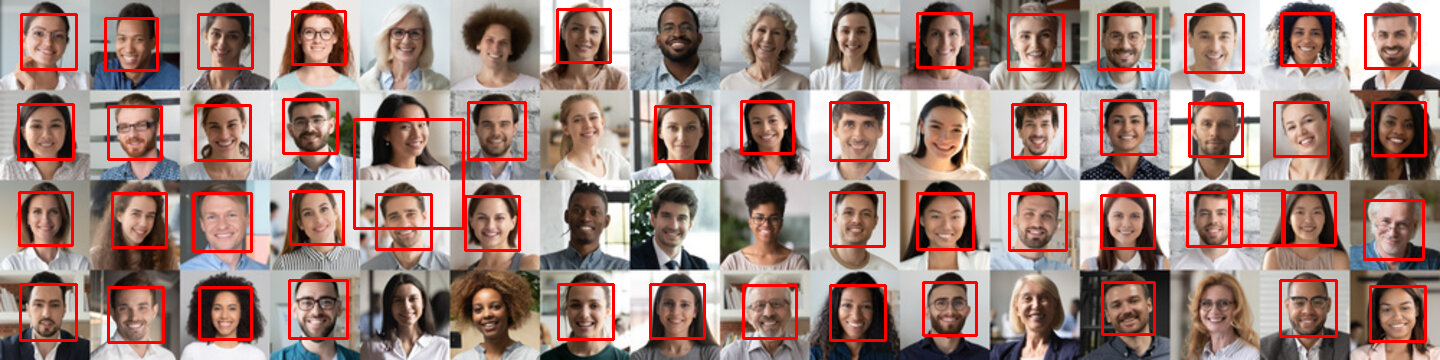

array([[ 557,    9,   53,   53],
       [ 292,   11,   53,   53],
       [ 917,   13,   54,   54],
       [1098,   14,   55,   55],
       [1281,   13,   52,   52],
       [  21,   14,   55,   55],
       [ 198,   14,   54,   54],
       [1008,   14,   55,   55],
       [1185,   14,   58,   58],
       [1365,   14,   54,   54],
       [ 105,   18,   52,   52],
       [ 283,   99,   54,   54],
       [1101,  100,   54,   54],
       [ 741,  101,   52,   52],
       [ 468,  102,   57,   57],
       [ 830,  102,   58,   58],
       [1274,  102,   54,   54],
       [1372,  102,   53,   53],
       [  18,  104,   55,   55],
       [ 195,  105,   55,   55],
       [1012,  104,   53,   53],
       [1189,  103,   53,   53],
       [ 655,  106,   55,   55],
       [ 108,  106,   53,   53],
       [ 354,  119,  109,  109],
       [ 290,  191,   53,   53],
       [ 830,  192,   54,   54],
       [ 917,  193,   56,   56],
       [1101,  195,   53,   53],
       [1187,  192,   54,   54],
       [12

In [13]:
test_1 = Photo('/content/drive/MyDrive/project_staff/faces_1.jpg')
test_1.find_face()